In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#1
def orbit_solve(r0,v0,tmax,N,method="euler"):

#set up timestep
    dt=tmax/(N-1)

#output times 
    t=np.linspace(0,tmax,N)
   
#acceleration
    
    def acc(pos):
        dist = np.linalg.norm(pos)
        if dist < 1e-12:  # this stops division by zero since it was messing up the later plots 
            return np.zeros_like(pos)
        return -pos / dist**3
    
#arrays for position and velocity
    N=10
    r=np.zeros((N,2))
    v=np.zeros((N,2))
    r[0]=r0
    v[0]=v0
    for i in range(0,N-1):
        a = acc(r[i])
        r[i+1]=r[i]+v[i]*dt
        v[i+1]=v[i]+a*dt
    return t,r,v

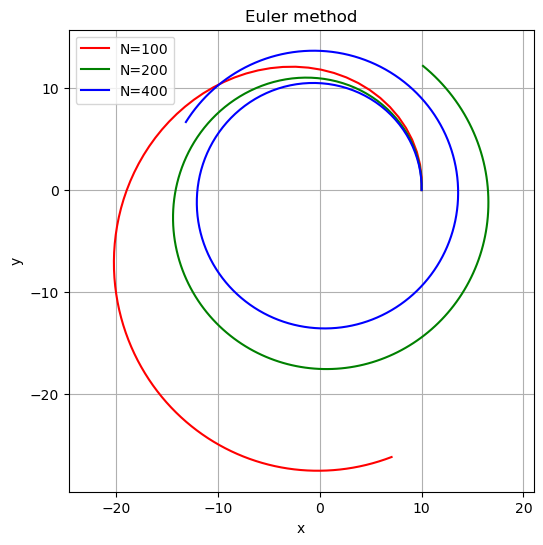

In [5]:
#2 

r = 10.0
omega = np.sqrt(1 / r**3)     # circular orbit angular speed
T = 2 * np.pi / omega             # orbital period

# Initial conditions
r0 = np.array([r, 0.0])
v0 = np.array([0.0, omega * r]) 

def orbit_solve(r0,v0,tmax,N,method="euler"):

#set up timestep
    dt=tmax/(N-1)

#output times 
    t=np.linspace(0,tmax,N)
   
#acceleration
    
    def acc(pos):
        dist = np.linalg.norm(pos)
        if dist < 1e-12:  # avoid division by zero
            return np.zeros_like(pos)
        return -pos / dist**3
    
#arrays for position and velocity
    
    r=np.zeros((N,2))
    v=np.zeros((N,2))
    r[0]=r0
    v[0]=v0
    for i in range(0,N-1):
        a = acc(r[i])
        r[i+1]=r[i]+v[i]*dt
        v[i+1]=v[i]+a*dt
    return t,r,v
tmax = 2 * T #two periods    
#points 100

t100,r100,v100=orbit_solve(r0,v0,tmax,101)

#points 200
t200,r200,v200=orbit_solve(r0,v0,tmax,201)
#points 400
t400,r400,v400=orbit_solve(r0,v0,tmax,401)
plt.figure(figsize=(6,6))
plt.plot(r100[:,0], r100[:,1], 'r', label='N=100')
plt.plot(r200[:,0], r200[:,1], 'g', label='N=200')
plt.plot(r400[:,0], r400[:,1], 'b', label='N=400')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Euler method")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()



In [7]:
#3
def orbit_solve(r0, v0, tmax, N, method='euler'):

    dt = tmax / (N-1)
    t = np.linspace(0, tmax, N)
    
    # Alloc arrays
    r = np.zeros((N,2))
    v = np.zeros((N,2))
    
    r[0] = r0
    v[0] = v0

    # acceleration function (gravity)
    def acc(pos):
        dist = np.linalg.norm(pos)
        if dist < 1e-12:
            return np.zeros_like(pos)
        return -pos / dist**3
       
    if method.lower() == 'euler':
        for i in range(N-1):
            a = acc(r[i])
            r[i+1] = r[i] + v[i]*dt
            v[i+1] = v[i] + a*dt

    
    elif method.lower() == 'euler-cromer':
        for i in range(N-1):
            a = acc(r[i])
            v[i+1] = v[i] + a*dt
            r[i+1] = r[i] + v[i+1]*dt

    elif method.lower() == 'verlet':
        
        a0 = acc(r[0])
        r[1] = r[0] + v[0]*dt + 0.5*a0*dt**2
        for i in range(1, N-1):
            a = acc(r[i])
            r[i+1] = 2*r[i] - r[i-1] + a*dt**2
            v[i] = (r[i+1] - r[i-1]) / (2*dt)  # approximate velocity
        v[-1] = (r[-1] - r[-2])/dt
    else:
        raise ValueError("Unknown method. Choose 'euler', 'euler-cromer', or 'verlet'.")

    return t, r, v



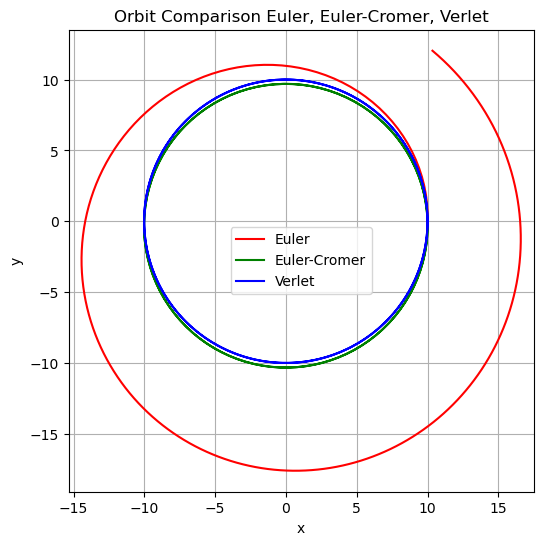

In [8]:
#4
r = 10.0
omega = np.sqrt(1 / r**3)  # angular speed for circular orbit
T = 2*np.pi / omega            # orbital period
r0 = np.array([r, 0.0])
v0 = np.array([0.0, omega * r])
tmax = 2*T  # simulate 2 periods
N = 200  


def orbit_solve(r0, v0, tmax, N, method='euler'):
    dt = tmax / (N-1)
    t = np.linspace(0, tmax, N)
    r = np.zeros((N,2))
    v = np.zeros((N,2))
    r[0] = r0
    v[0] = v0

    def acc(pos):
        dist = np.linalg.norm(pos)
        if dist < 1e-12:
            return np.zeros_like(pos)
        return -pos / dist**3

    if method.lower() == 'euler':
        for i in range(N-1):
            a = acc(r[i])
            r[i+1] = r[i] + v[i]*dt
            v[i+1] = v[i] + a*dt

    elif method.lower() == 'euler-cromer':
        for i in range(N-1):
            a = acc(r[i])
            v[i+1] = v[i] + a*dt
            r[i+1] = r[i] + v[i+1]*dt

    elif method.lower() == 'verlet':
        a0 = acc(r[0])
        r[1] = r[0] + v[0]*dt + 0.5*a0*dt**2
        for i in range(1, N-1):
            a = acc(r[i])
            r[i+1] = 2*r[i] - r[i-1] + a*dt**2
            v[i] = (r[i+1] - r[i-1]) / (2*dt)
        v[-1] = (r[-1] - r[-2]) / dt

    else:
        raise ValueError("Unknown method. Choose 'euler', 'euler-cromer', or 'verlet'.")

    return t, r, v

t_e, r_e, v_e = orbit_solve(r0, v0, tmax, N, method='euler')
t_ec, r_ec, v_ec = orbit_solve(r0, v0, tmax, N, method='euler-cromer')
t_v, r_v, v_v = orbit_solve(r0, v0, tmax, N, method='verlet')

plt.figure(figsize=(6,6))
plt.plot(r_e[:,0], r_e[:,1], 'r', label='Euler')
plt.plot(r_ec[:,0], r_ec[:,1], 'g', label='Euler-Cromer')
plt.plot(r_v[:,0], r_v[:,1], 'b', label='Verlet')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Orbit Comparison Euler, Euler-Cromer, Verlet")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()



In [9]:
#euler method gives less circular spiral whereas the other two are very circular 